# Описание сервиса

Сервис аренды самокатов GoFast передал данные о некоторых пользователях из нескольких городов, а также об их поездках. Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:

Без подписки:
    
    абонентская плата отсутствует;
    стоимость одной минуты поездки — 8 рублей;
    стоимость старта (начала поездки) — 50 рублей;

С подпиской Ultra:
   
    абонентская плата — 199 рублей в месяц;
    стоимость одной минуты поездки — 6 рублей;
    стоимость старта — бесплатно.

# Цель исследования

Необходимо проанализировать данные и проверить некоторые гипотезы, которые могут помочь бизнесу вырасти.

# Особенности отрасли и данных

Анализ будет вестись по трём csv файлам: 
    
    users_go.csv - информация о пользователях
    rides_go.csv - информация о поездках 
    subscriptions_go.csv - информация о подписках

# План исследования

Шаг 1. Загрузка данных
    
    1. Считать CSV-файлы с данными с помощью библиотеки pandas и сохранить их в датафреймы.
    2. Вывести первые строки каждого набора данных. Изучить общую информацию о каждом датафрейме.

Шаг 2. Предобработка данных
    
    1. Создать новый столбец с номером месяца на основе столбца date.
    2. Проверить наличие пропущенных значений и дубликатов в датафреймах. Обработать их, если такие значения присутствуют.

Шаг 3. Исследовательский анализ данных
    
    Описать и визуализировать общую информацию о пользователях и поездках:
    1. частота встречаемости городов;
    2. соотношение пользователей с подпиской и без подписки;
    3. возраст пользователей;
    4. расстояние, которое пользователь преодолел за одну поездку;
    5. продолжительность поездок.

Шаг 4. Объединение данных
    
    1. Объединить данные о пользователях, поездках и подписках в один датафрейм. 
    2. Создать ещё два датафрейма из датафрейма, созданного на этапе 4.1.
        c данными о пользователях без подписки;
        с данными о пользователях с подпиской.
    3. Визуализировать информацию о расстоянии и времени поездок для пользователей обеих категорий.

Шаг 5. Подсчёт выручки
    
    1. Создать датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: найти   суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.
    2. В этот же датафрейм добавить столбец с помесячной выручкой, которую принёс каждый пользователь. 

Шаг 6. Проверка гипотез

       Продакт-менеджеры сервиса хотят увеличить количество пользователей с подпиской. Для этого они будут проводить различные акции, но сначала нужно выяснить несколько важных моментов.
    1. Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. 
    2.  Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? 
    3. Проверить гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделать вывод.

## Загрузка данных

### Загрузка библиотек

Импортируем библиотеки, которые понадобятся для работы

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats as st

### Загрузка таблиц и инициализация

Прочитаем файлы csv и сохраним их в переменных

In [2]:
data_users = pd.read_csv('C:/Проекты/Сервис_аренды_самокатов/users_go.csv')
data_rides = pd.read_csv('C:/Проекты/Сервис_аренды_самокатов/rides_go.csv',
                         parse_dates=['date'])
data_subscriptions = pd.read_csv('C:/Проекты/Сервис_аренды_самокатов/subscriptions_go.csv')

### Первичный анализ

Напишем функцию, которая выводит первые 10 строк и информацию о таблице, которая подаётся на вход.

In [3]:
def output_information(table):
    print(table.head(10))
    print()
    print()
    table.info()

#### Первичный анализ таблицы data_users

Выведем информкцию о таблице data_users

In [4]:
output_information(data_users)

   user_id        name  age            city subscription_type
0        1        Кира   22          Тюмень             ultra
1        2   Станислав   31            Омск             ultra
2        3     Алексей   20          Москва             ultra
3        4  Константин   26  Ростов-на-Дону             ultra
4        5       Адель   28            Омск             ultra
5        6      Регина   25       Краснодар             ultra
6        7       Игорь   23            Омск             ultra
7        8        Юрий   23       Краснодар             ultra
8        9          Ян   21       Пятигорск             ultra
9       10     Валерий   18    Екатеринбург             ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age              

База содержит 5 столбцов и 1565 строк. 

    user_id - уникальный идентификатор пользователя
    name - имя пользователя
    age - возраст
    city - 	город
    subscription_type - тип подписки (free, ultra)

Видим, что названия столбцов корректные и в исправлении не нуждаются. 

Тип данных корректный у всех столбцов и в исправлении не нуждается. 

Пропусков в таблице нет. 

Потребуется сделать проверку на явные дубликаты и неявные столбцов name, city, subscription_type.

#### Первичный анализ таблицы data_rides

Выведем информацию о таблице data_rides

In [5]:
output_information(data_rides)

   user_id     distance   duration       date
0        1  4409.919140  25.599769 2021-01-01
1        1  2617.592153  15.816871 2021-01-18
2        1   754.159807   6.232113 2021-04-20
3        1  2694.783254  18.511000 2021-08-11
4        1  4028.687306  26.265803 2021-08-28
5        1  2770.890808  16.650138 2021-10-09
6        1  3039.020292  14.927879 2021-10-19
7        1  2842.118050  23.117468 2021-11-06
8        1  3412.690668  15.238072 2021-11-14
9        1   748.690645  15.041884 2021-11-22


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


База содержит 4 столбца: 

    user_id - уникальный идентификатор пользователя
    distance - расстояние, которое пользователь проехал в текущей сессии (в метрах)
    duration - продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
    date - 	дата совершения поездки
    
Видим, что названия столбцов корректные, и в исправлении не нуждаются.

Формат столбца data был изменён на подходящий при загрузке данных. Остальные столбцы в правке не нуждаются.

Пропусков в таблице нет.

Потребуется сделать проверку на явные дубликаты.

#### Первичный анализ таблицы data_subscriptions

Выведем информцию о таблице data_subscriptions.

In [6]:
output_information(data_subscriptions)

  subscription_type  minute_price  start_ride_price  subscription_fee
0              free             8                50                 0
1             ultra             6                 0               199


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


База содержит 4 столбца: 

    subscription_type - тип подписки
    minute_price - стоимость одной минуты поездки по данной подписке
    start_ride_price - стоимость начала поездки
    subscription_fee - стоимость ежемесячного платежа
    
База содержит две строки.
    
Названия столбцов корректные и в исправлении не нуждаются.

Тип данных столбцов корректные и в исправлении не нуждаются.

Пропусков нет.

Поскольку строки всего две, проверку на явные дубликаты проводить не нужно.

### Вывод по разделу

Для проведения анализа были импортированы 4 библиотеки: 
    
    matplotlib.pyplot;
    pandas;
    numpy;
    scipy.

Предоставленные csv файлы были были сохранены в следующие переменные:

    users_go.csv как data_users; 
    rides_go.csv как data_rides;
    subscriptions_go.csv как data_subscriptions.
    
    
**Таблица data_users**    
    
data_users содержит 5 столбцов и 1565 строк.

    user_id - уникальный идентификатор пользователя
    name - имя пользователя
    age - возраст
    city - 	город
    subscription_type - тип подписки (free, ultra)

Видим, что названия столбцов корректные и в исправлении не нуждаются.

Тип данных корректный у всех столбцов и в исправлении не нуждается.

Пропусков в таблице нет.

Потребуется сделать проверку на явные дубликаты и неявные столбцов name, city, subscription_type.

**Таблица data_rides**  

data_rides содержит 4 столбца:

    user_id - уникальный идентификатор пользователя
    distance - расстояние, которое пользователь проехал в текущей сессии (в метрах)
    duration - продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
    date - 	дата совершения поездки

Видим, что названия столбцов корректные, и в исправлении не нуждаются.

Формат столбца data был изменён на подходящий при загрузке данных. Остальные столбцы в правке не нуждаются.

Пропусков в таблице нет.

Потребуется сделать проверку на явные дубликаты.

**Таблица data_subscriptions** 

data_subscriptions содержит 4 столбца:

    subscription_type - тип подписки
    minute_price - стоимость одной минуты поездки по данной подписке
    start_ride_price - стоимость начала поездки
    subscription_fee - стоимость ежемесячного платежа

База содержит две строки.

Названия столбцов корректные и в исправлении не нуждаются.

Тип данных столбцов корректные и в исправлении не нуждаются.

Пропусков нет.

Поскольку строки всего две, проверку на явные дубликаты проводить не нужно.

## Предобработка данных

### Добавление нового столбца

Добавим в датафрейм data_rides новый столбец где указан номер месяца 

In [7]:
data_rides['month'] = data_rides['date'].dt.month
#Проверим результат
data_rides.head()

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


Столбец month был успешно добавлен.

### Проверка на явные дубликаты

Проверим базы data_users и data_rides на наличие явных дубликатов.

In [8]:
print("Количество явных дубликатов в таблице data_users:", data_users.duplicated().sum())
print("Количество явных дубликатов в таблице data_rides:", data_rides.duplicated().sum())

Количество явных дубликатов в таблице data_users: 31
Количество явных дубликатов в таблице data_rides: 0


Удалим дубликаты

In [9]:
data_users = data_users.drop_duplicates()
#Проверим результат
print("Количество явных дубликатов в таблице data_users:", data_users.duplicated().sum())

Количество явных дубликатов в таблице data_users: 0


Явные дубликаты были удалены.

### Вывод по разделу

В датафрейм data_rides добавлен столбец month где указан номер месяца.


Была проверена база data_users на наличие явных дубликатов. Обнаружился 31 дубликат. Они были удалены. Явных дубликатов в датафрейме data_rides не оказалось.

##  Исследовательский анализ данных

Напишем функцию создания графиков

In [10]:
# column - колонка таблицы в формате table['column_name']
# kind - Тип графика. Пример: 'hist'
# bins - количество корзин для гистограммы
# title - название для графика
# xlabel - наименование оси x
# ylabel - наименование оси y

def create_graph(column, kind, bins, title, xlabel, ylabel):
    column.plot(kind=kind,
                bins=bins,
                title=title,
                figsize = (13,8),
                grid=True)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel);

Напишем функцию вычисления агрегирующих функций (медиана, среднее, мода)

In [11]:
# column - столбец таблицы в формате table['column_name']
# column_name - название столбца в формате 'column_name'
# mode - вычислять ли моду или нет

def calculate_agg_func(column, column_name, mode=False):
    print(f'Медиана столбца {column_name}:', column.median())
    print(f'Среднее столбца {column_name}:', column.mean())
    if mode == True:
        print(f'Мода столбца {column_name}:', column.mode()[0])

### Частота встречаемости городов

Узнаем, сколько людей пользуется сервисом в определённых городах

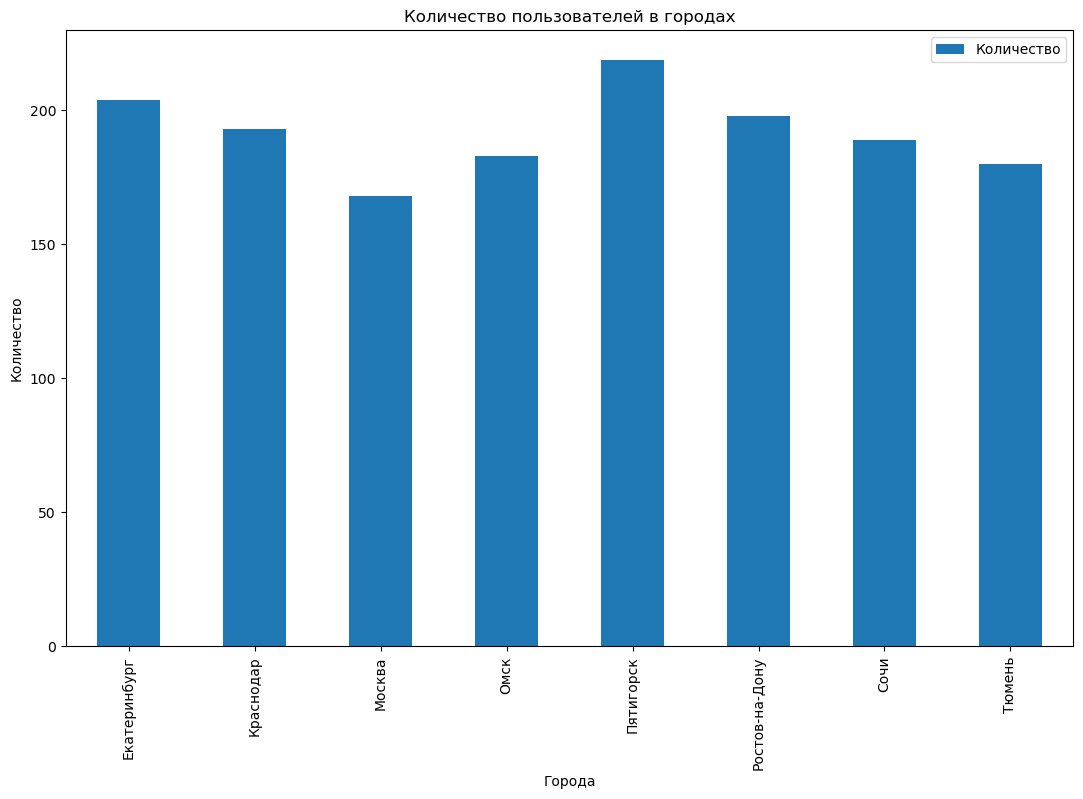

In [12]:
agg_func_math = {'city':'count'}
cities_table = data_users.groupby('city').agg(agg_func_math)
cities_table = cities_table.rename(columns={'city': 'Количество'})
cities_table.plot(kind = 'bar', 
                  title='Количество пользователей в городах',
                  xlabel='Города', 
                  ylabel='Количество', 
                  figsize = (13,8));

Больше всего пользователей в Пятигорске: 219. Меньше всего - в Москве: 168.

### Соотношение пользователей с подпиской и без подписки

Узнаем соотношение пользователей с подпиской и без подписки

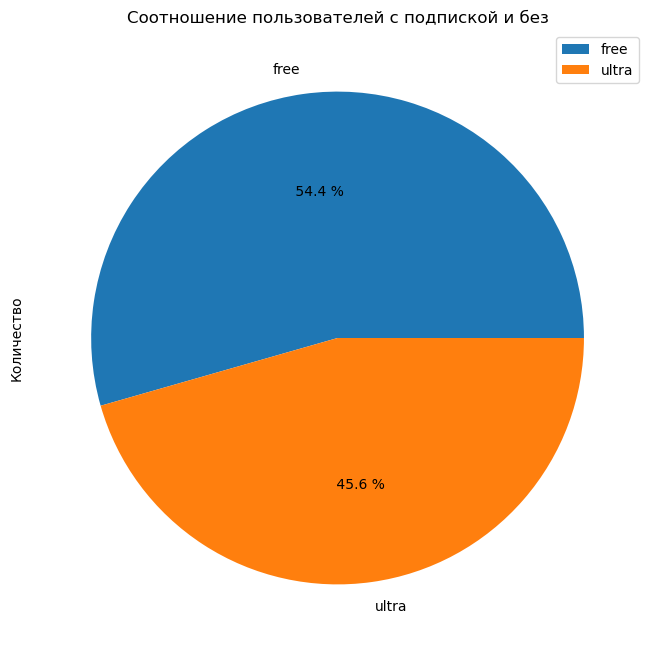

In [13]:
agg_func_math = {'subscription_type':'count'}
subscription_table = data_users.groupby('subscription_type').agg(agg_func_math)
subscription_table = subscription_table.rename(columns={'subscription_type': 'Количество'})
subscription_table.plot(y = 'Количество', 
                        kind = 'pie', 
                        title='Соотношение пользователей с подпиской и без',
                        figsize = (13,8),
                        autopct ='% 1.1f %%');

Видим, что пользователей без подписки чуть больше - 54.4% против 45.6%. Присутствует небольшой дисбаланс классов.

### Возраст пользователей

Узнаем насколько часто встречаются люди определённого возраста

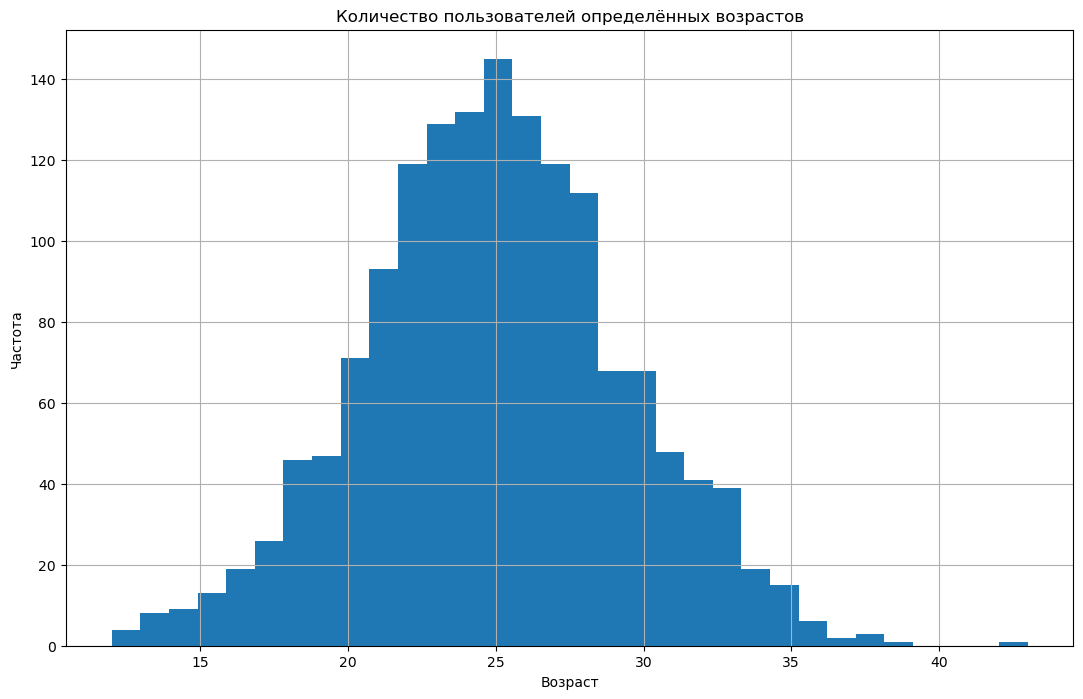

In [14]:
create_graph(data_users['age'], 'hist', 32, 'Количество пользователей определённых возрастов', 'Возраст', 'Частота')

In [15]:
calculate_agg_func(data_users['age'], 'age', True)

Медиана столбца age: 25.0
Среднее столбца age: 24.903520208604956
Мода столбца age: 25


Гистограмма имеет вид нормального распределения. Больше всего людей возраста 25-и лет. Каких либо отклонений не заметно.

### Расстояние, которое пользователь преодолел за одну поездку

Узнаем расстояния, которые преодолевают пользователи за одну поездку

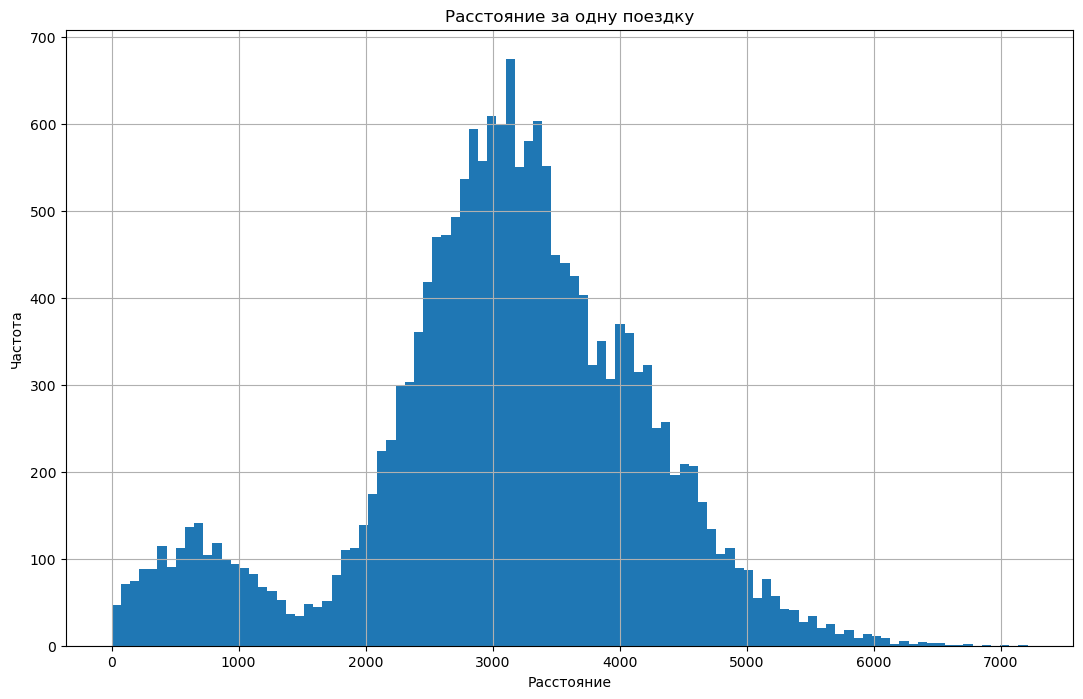

In [16]:
create_graph(data_rides['distance'], 'hist', 100, 'Расстояние за одну поездку', 'Расстояние', 'Частота')

In [17]:
calculate_agg_func(data_rides['distance'], 'distance')

Медиана столбца distance: 3133.6099936787664
Среднее столбца distance: 3070.6599756818814


График имеет вид нормального распределения с небольшим "холмом" в диапазоне от 0 до 1500. Видим, что чаще всего пользователи преодолевают расстояние около 3070- 3133. В дальнейшеем анализе разделим пользователей на тех, у кого есть подписка и на тех, у кого её нет. Так мы увидим, насколько сильно отличаются гистограммы для разных групп пользователей.

### Продолжительность поездок

Узнаем самую частую продолжительность поездок

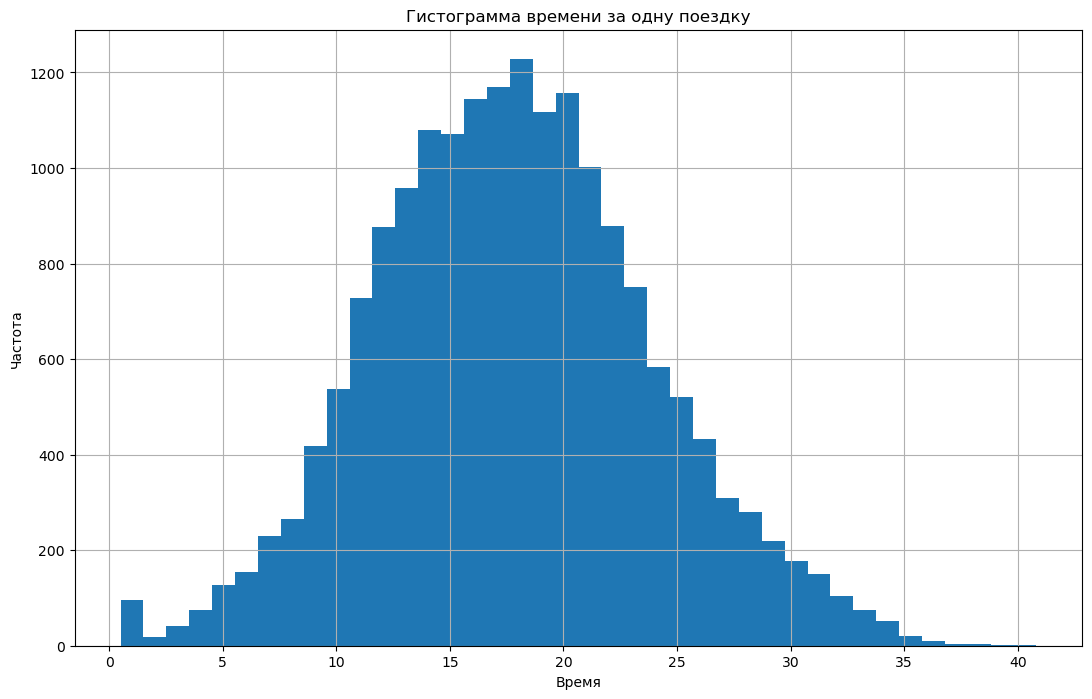

In [18]:
create_graph(data_rides['duration'], 'hist', 40, 'Гистограмма времени за одну поездку', 'Время', 'Частота')

In [19]:
calculate_agg_func(data_rides['duration'], 'duration')

Медиана столбца duration: 17.678394530393803
Среднее столбца duration: 17.80501119798444


Гистограмма имеет вид нормального распределения с необольшим вспеском значеник около 1.

Чаще всего пользователи тратят на поездку около 17 минут. В дальнейшеем анализе разделим пользователей на тех, у кого есть подписка и на тех, у кого её нет. Так мы увидим, насколько сильно отличаются гистограммы для разных групп пользователей.

### Вывод по разделу

Было исследовано, сколько людей пользуется сервисом в определённых городах. Больше всего пользователей в Пятигорске: 219. Меньше всего - в Москве: 168.

Было исследовано соотношение пользователей с подпиской и без подписки. Пользователей без подписки чуть больше - 54.4% против 45.6%. Присутствует небольшой дисбаланс классов.

С помощью гистограммы было исследовано насколько часто встречаются люди определённого возраста. Больше всего людей возраста 25-и лет. Гистограмма имеет вид нормального распределения. Каких либо отклонений не заметно.

С помощью гистограммы было исследовано расстояние, которые преодолевают пользователи за одну поездку. График имеет вид нормального распределения с небольшим "холмом" в диапазоне от 0 до 1500. Чаще всего пользователи преодолевают расстояние около 3000 метров. В дальнейшеем анализе разделим пользователей на тех, у кого есть подписка и на тех, у кого её нет. Так мы увидим, насколько сильно отличаются гистограммы для разных групп пользователей

С помощью гистограммы было исследована самая частая продолжительность поездок. Гистограмма имеет вид нормального распределения с необольшим вспеском значеник около 1. Чаще всего пользователи тратят на поездку около 17 минут. В дальнейшеем анализе разделим пользователей на тех, у кого есть подписка и на тех, у кого её нет. Так мы увидим, насколько сильно отличаются гистограммы для разных групп пользователей.

## Объединение данных

### Объединение данных в единый датафрейм

Объеденим таблицы data_users и data_rides и сохраним в переменную data_final

In [20]:
data_final = data_users.merge(data_rides, on='user_id', how='left')

Присоеденим к новой таблице датафрейм data_subscriptions

In [21]:
data_final = data_final.merge(data_subscriptions, on='subscription_type', how='left')

Округлим расстояние поездок

In [22]:
data_final['duration'] = np.ceil(data_final['duration']).astype('int')

Проверим результат

In [23]:
data_final

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,26,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,16,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,7,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,19,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,27,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,20,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.423057,22,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.185507,19,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.308661,17,2021-11-27,11,8,50,0


### Создание новых датафреймов

Создадим датафрейм с данными о пользователях без подписки

In [24]:
data_users_without_subscription = data_final[data_final['subscription_type'] == 'free']
#Проверим результат
print('Уникальные значения столбца subscription_type:', data_users_without_subscription['subscription_type'].unique())
print('Размерность таблицы:', data_users_without_subscription.shape)

Уникальные значения столбца subscription_type: ['free']
Размерность таблицы: (11568, 12)


Создадим датафрейм с данными о пользователях с подпиской

In [25]:
data_users_with_subscription = data_final[data_final['subscription_type'] == 'ultra']
#Проверим результат
print('Уникальные значения столбца subscription_type:', data_users_with_subscription['subscription_type'].unique())
print('Размерность таблицы:', data_users_with_subscription.shape)

Уникальные значения столбца subscription_type: ['ultra']
Размерность таблицы: (6500, 12)


### Вывод по разделу

Три таблицы были объеденены в один. Расстояние поездок было округлено до целого. 

Были созданы новые датафреймы: Первый - содержит данные только о пользователях без подписки, второй - с подпиской.

## Визуализация информации по новым датафреймам

Создадим функцию, которая будет строить две гистограммы на одном графике.

In [26]:
def create_both_hist(y, bins_1, bins_2, title, xlabel):
    ax = data_users_without_subscription.plot(
        kind='hist',
        y=y,
        histtype='step',
        bins=bins_1,
        linewidth=5,
        alpha=0.7,
        label='Без подписки')
    
    data_users_with_subscription.plot(
        kind='hist',
        y=y,
        histtype='step',
        bins=bins_2,
        linewidth=5,
        alpha=0.7,
        label='С подпиской',
        ax=ax,
        grid=True,
        legend=True,
        figsize = (13,8),
        title=title)
    
    plt.xlabel(xlabel)
    plt.ylabel('Частота')
    plt.show()

### Пройденное расстояние у пользователей без подписки

Построим гистограмму по пройденному расстоянию у пользователей без подписки

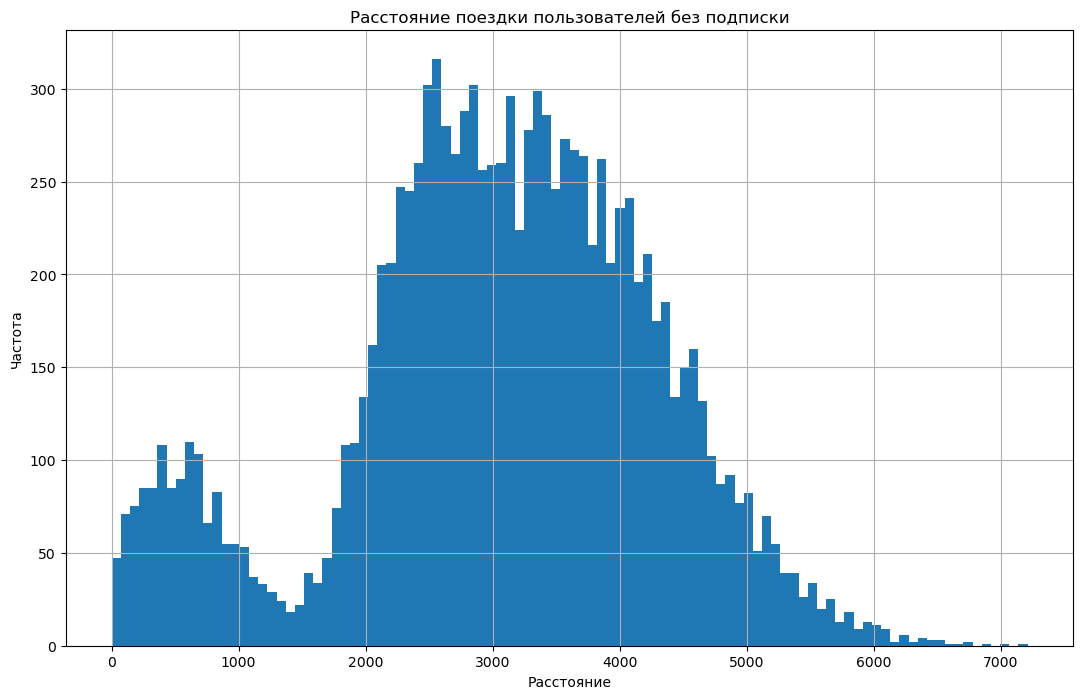

In [27]:
create_graph(data_users_without_subscription['distance'], 'hist', 100, 'Расстояние поездки пользователей без подписки', 'Расстояние', 'Частота')

In [28]:
print('Медиана столбца distance:', data_users_without_subscription['distance'].median())
print('Среднее столбца distance:', data_users_without_subscription['distance'].mean())

Медиана столбца distance: 3114.648464847295
Среднее столбца distance: 3045.495281671816


На гистограмме видим график нормального распределения с небольшим "холмом" от 0 до 1500. Чаще всего пользователи преодолевают 2500 - 3500 метров.

### Пройденное расстояние у пользователей с подпиской

Построим гистограмму по пройденному расстоянию у пользователей с подпиской

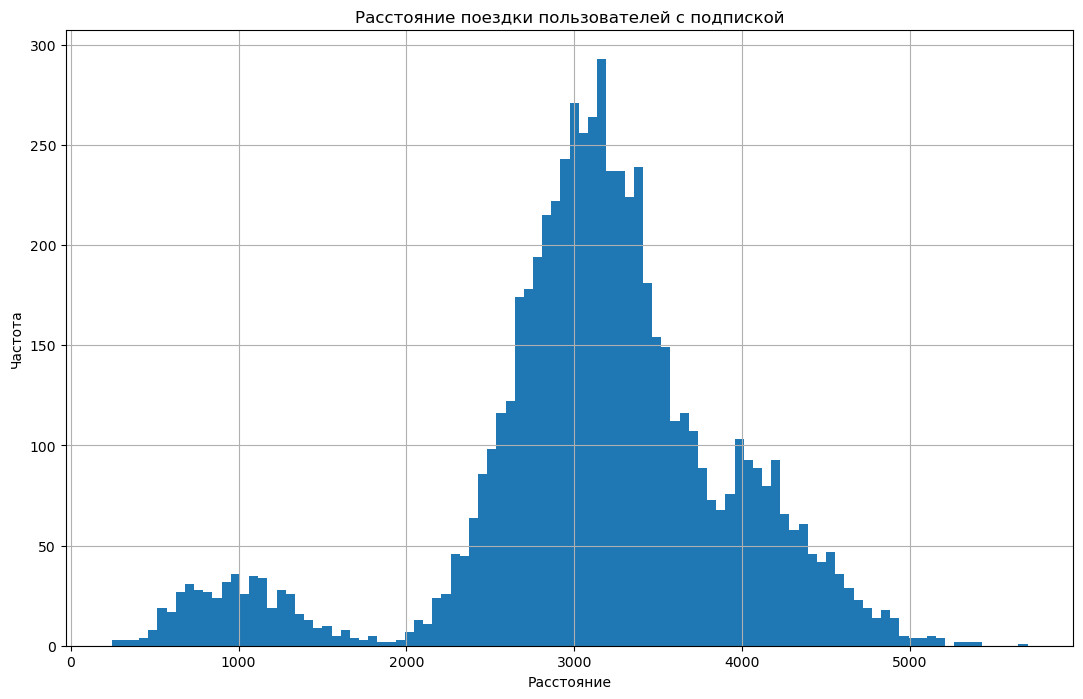

In [29]:
create_graph(data_users_with_subscription['distance'], 'hist', 100, 'Расстояние поездки пользователей с подпиской', 'Расстояние', 'Частота')

In [30]:
print('Медиана столбца distance:', data_users_with_subscription['distance'].median())
print('Среднее столбца distance:', data_users_with_subscription['distance'].mean())

Медиана столбца distance: 3148.6372291760854
Среднее столбца distance: 3115.4453880370247


На гистограмме видим график нормального распределения с небольшим "холмом" от 250 до 1500. Чаще всего пользователи преодолевают расстояние около 3000 метров.

### Сравнение двух гистограмм расстояния

Построим обе гистограммы на одном графике

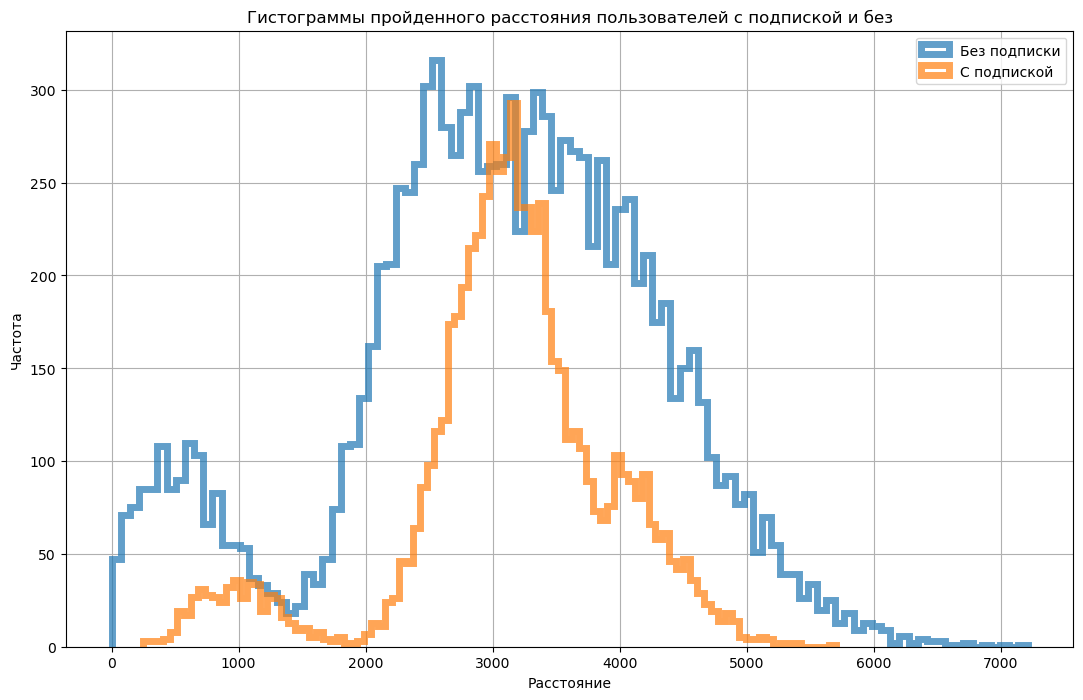

In [31]:
create_both_hist('distance', 100, 100, 'Гистограммы пройденного расстояния пользователей с подпиской и без', 'Расстояние')

Стоит учитывать, что количество поездок у пользователей без подписки почти в два раза больше, чем у тех, у кого она есть. Видим, что пользователи без подписки покрывают больший диапазон значений в районе пика гистограммы, так и у "холма", который находится в диапазоне от 250 до 1000.

### Время поездок у пользователей без подписки

Построим гистограмму по времени поездок у пользователей без подписки

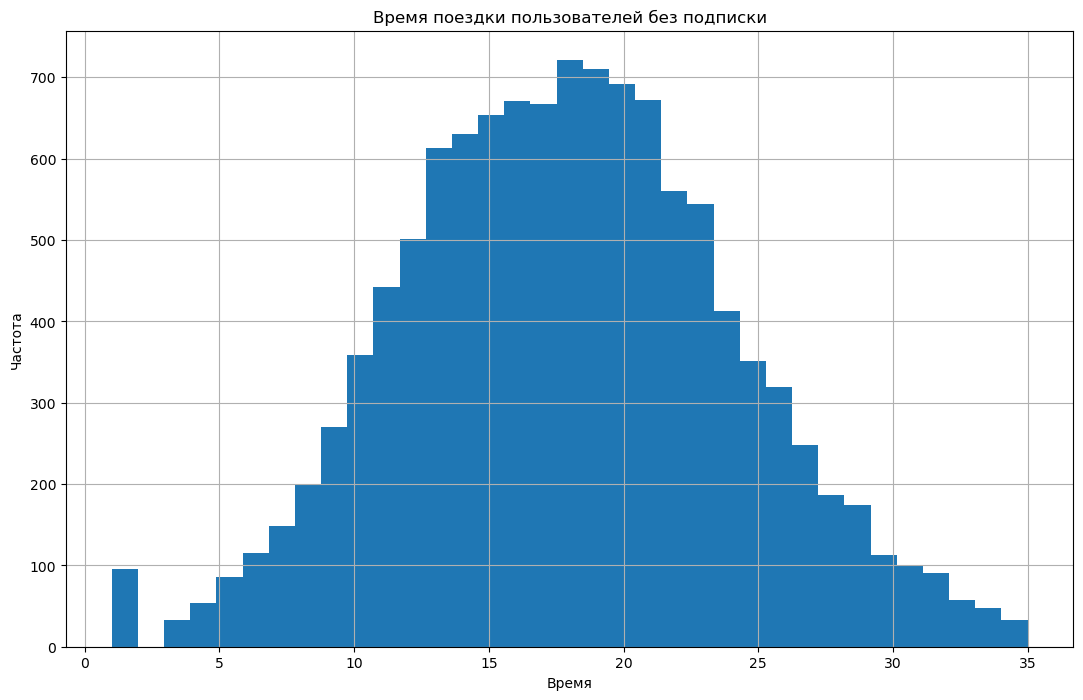

In [32]:
create_graph(data_users_without_subscription['duration'], 'hist', 35, 'Время поездки пользователей без подписки', 'Время', 'Частота')

In [33]:
print('Медиана столбца duration:', data_users_without_subscription['duration'].median())
print('Среднее столбца duration:', data_users_without_subscription['duration'].mean())
print('Мода столбца duration:', data_users_without_subscription['duration'].mode()[0])

Медиана столбца duration: 18.0
Среднее столбца duration: 17.890992392807746
Мода столбца duration: 18


Чаще всего пользователи без подписки тратят около 18 минут на поездку. Виден небольшой пик в районе единицы.

### Время поездок у пользователей с подпиской

Построим гистрограмму по времени поездок у пользователей с подпиской

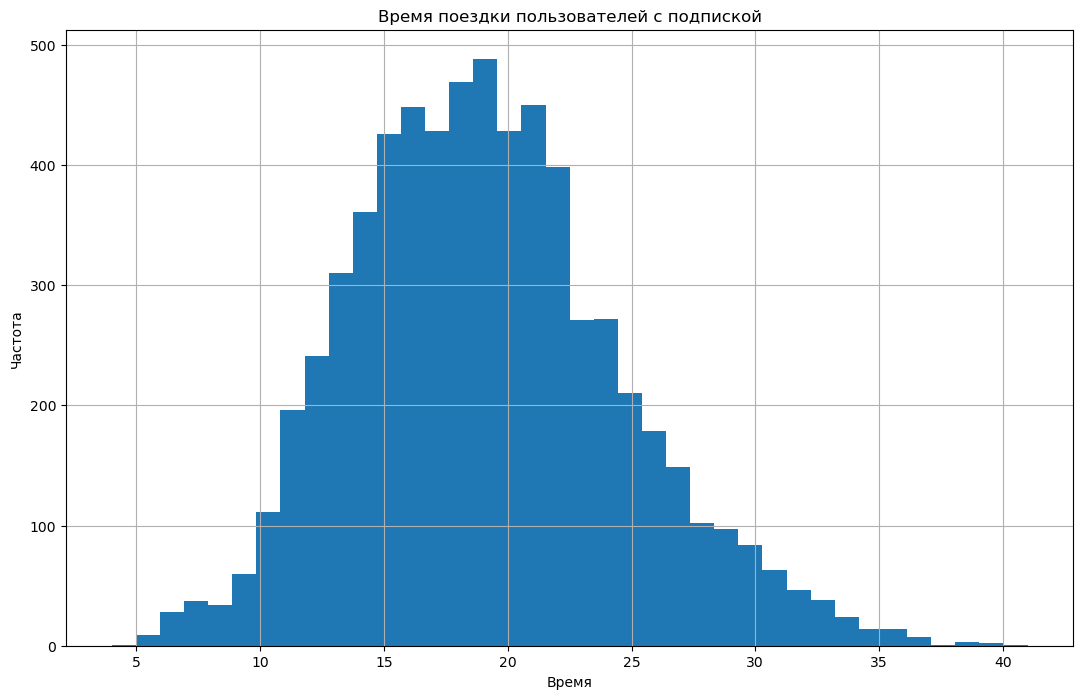

In [34]:
create_graph(data_users_with_subscription['duration'], 'hist', 38, 'Время поездки пользователей с подпиской', 'Время', 'Частота')

In [35]:
print('Медиана столбца duration:', data_users_with_subscription['duration'].median())
print('Среднее столбца duration:', data_users_with_subscription['duration'].mean())
print('Мода столбца duration:', data_users_with_subscription['duration'].mode()[0])

Медиана столбца duration: 19.0
Среднее столбца duration: 19.037692307692307
Мода столбца duration: 19


Чаще всего пользователи с подпиской тратят около 19 мин на поездки

### Сравнение двух гистограмм времени

Построим обе гистограммы затраченного времени на одном графике

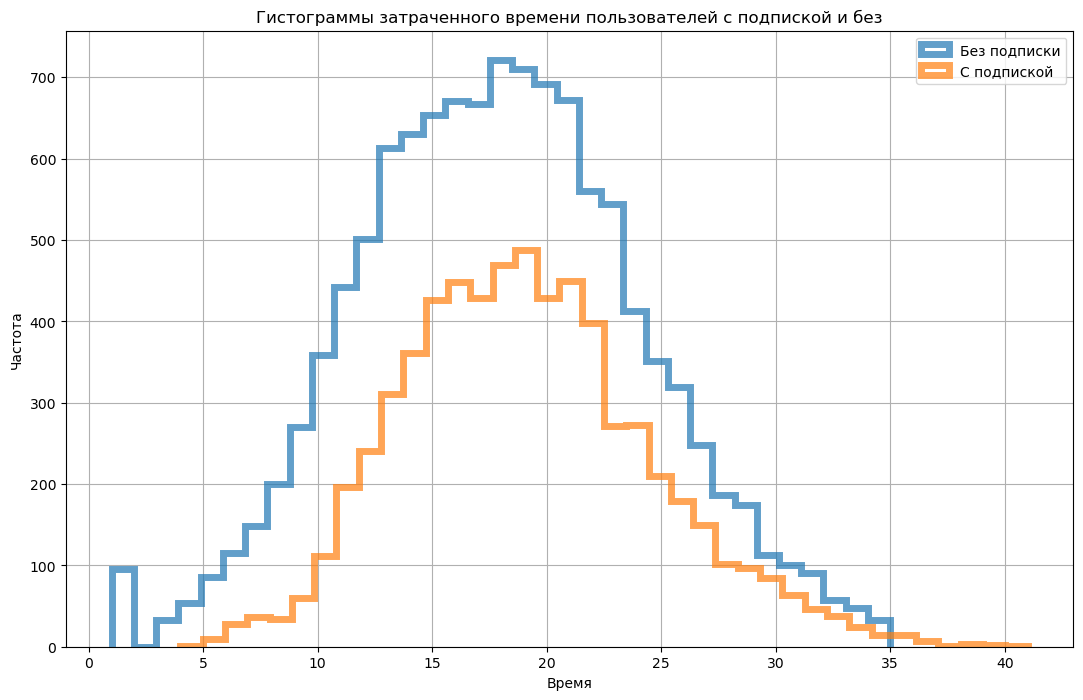

In [36]:
create_both_hist('duration', 35, 38, 'Гистограммы затраченного времени пользователей с подпиской и без', 'Время')

Видим что, гистограмма пользователей без подписи является более увеличенной версии пользователей с подпиской за счет большего количества поездок. Видим, что у пользователей с подпиской нет поездок длительностью в одну минуту. В целом пользователи обеих групп тратят примерно одинаковое время.

### Вывод по разделу

Были объедены датафреймы data_users и data_rides. Новый датафрем был назван data_final.

Был создан датафрейм с данными о пользователях с подпиской и назван data_users_with_subscription.

Была построена гистограмма по пройденному расстоянию у пользователей без подписки. Чаще всего пользователи без подписки преодолевают расстояние около 2600 метров.

Была построена гистограмма по пройденному расстоянию у пользователей с подпиской. Чаще всего пользователи с подпиской преодолевают расстояние околок 3150 метров.

Были построены обе гистограммы на одном графике. Пользователи без подписки покрывают больший диапазон значений в районе пика гистограммы, так и у "холма", который находится в диапазоне от 250 до 1000.

Была построена гистограмма по времени поездок у пользователей без подписки. Чаще всего пользователи без подписки тратят от 17 до 20 мин на поездки. 

Была построена гистрограмма по времени поездок у пользователей с подпиской. Чаще всего пользователи с подпиской тратят около 16 мин на поездки

Были построены обе гистограммы затраченного времени на одном графике. Гистограмма пользователей без подписи является более увеличенной версии пользователей с подпиской за счет большего количества поездок. У пользователей с подпиской нет поездок длительностью в одну минуту. В целом пользователи обеих групп тратят примерно одинаковое время.

## Подсчёт выручки

### Создание датафрейма с агрегированными данными о поездках

Создадим датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4. Найдём суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.

In [37]:
data_about_every_user = data_final\
    .groupby(['subscription_type', 'user_id','month'])\
    .agg({'duration': 'sum', 'distance':'sum', 'date':'count'})\
    .rename(columns={'date':'rides_count'})
#Сбросим индексы
data_about_every_user = data_about_every_user.reset_index()
#Проверим результат
data_about_every_user

,subscription_type,user_id,month,duration,distance,rides_count
0,free,700,1,15,2515.690719,1
1,free,700,2,89,13446.659764,5
2,free,700,3,19,3798.334905,1
3,free,700,4,16,2984.551206,1
4,free,700,6,29,5927.650988,2
...,...,...,...,...,...,...
11326,ultra,699,6,17,4072.797406,1
11327,ultra,699,8,45,7018.324143,2
11328,ultra,699,9,31,6364.861911,2
11329,ultra,699,10,16,4707.845501,1


### Добавление нового столбца

Создадим новый столбец с доходом в таблице из предыдущего шага

In [38]:
data_about_every_user['income'] = [0]*data_about_every_user.shape[0]

for i in range(data_about_every_user.shape[0]):
    if data_about_every_user['subscription_type'][i] == 'free':
        data_about_every_user.loc[i, 'income'] = 50 * data_about_every_user['rides_count'][i] + (8 * data_about_every_user['duration'][i])
    else:
        data_about_every_user.loc[i, 'income'] = data_about_every_user['rides_count'][i] + (6 * data_about_every_user['duration'][i]) + 199
        
        
#Проверим результат
data_about_every_user

,subscription_type,user_id,month,duration,distance,rides_count,income
0,free,700,1,15,2515.690719,1,170
1,free,700,2,89,13446.659764,5,962
2,free,700,3,19,3798.334905,1,202
3,free,700,4,16,2984.551206,1,178
4,free,700,6,29,5927.650988,2,332
...,...,...,...,...,...,...,...
11326,ultra,699,6,17,4072.797406,1,302
11327,ultra,699,8,45,7018.324143,2,471
11328,ultra,699,9,31,6364.861911,2,387
11329,ultra,699,10,16,4707.845501,1,296


### Вывод по разделу

Создан датафрейм data_about_every_user с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4. Найдено суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.

Был создан новый столбец 'income' с суммарным доходом каждого пользователя за каждый месяц в таблице data_about_every_user.

## Проверка гипотез

### Гипотеза 1

Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании.

Нулевая гипотеза: Среднее время поездок пользователей с подпиской = среднее время поездок пользователей без подписки

Альтернативная гипотеза: Среднее время поездок пользователей с подпиской > среднее время поездок пользователей без подписки

In [39]:
#Выберем из общей таблицы тех пользователей, которые имеют подписку
users_ultra = data_final[data_final['subscription_type'] == 'ultra']
#Выделим из получившейся таблицы столбец с временем поездки
users_ultra = users_ultra['duration']


#Выберем из общей таблицы пользователей без подписки
users_free = data_final[data_final['subscription_type'] == 'free']
#Выделим из получившейся таблицы столбец с временем поездки
users_free = users_free['duration']


alpha = 0.05 # уровень статистической значимости

results = st.ttest_ind(users_ultra, users_free, equal_var=False, alternative='greater')

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу') 

p-значение: 1.1814679253701353e-36
Отвергаем нулевую гипотезу


Тест показал, что пользователи с подпиской тратят больше времени времени на поездки.

### Гипотеза 2

Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? 

Нулевая гипотеза: Среднее расстояние поездки пользователей с подпиской = 3130 метров

Альтернативная гипотеза: Среднее расстояние поездки пользователей с подпиской > 3130 метров

In [40]:
#Выберем из общей таблицы тех пользователей, которые имеют подписку
users_ultra = data_final[data_final['subscription_type'] == 'ultra']
#Выделим из получившейся таблицы столбец с пройденной дистанцией за поездку
users_ultra = users_ultra['distance']


alpha = 0.05

results = st.ttest_1samp(
    users_ultra, 
    3130,
      alternative= 'greater')

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу') 

p-значение: 0.9195368847849785
Не отвергаем нулевую гипотезу


Тест показал, что среднее расстояние, которое проезжают пользователи, не превышает 3130 метров.

### Гипотеза 3

Необходимо проверить гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. 

Нулевая гипотеза: Помесячная выручка пользователей с подпиской = помесячная выручка пользователей без подписки

Альтернаятивная гипотеза: Помесячная выручка пользователей с подпиской > помесячная выручка пользователей без подписки

In [41]:
#Выберем из общей таблицы тех пользователей, которые имеют подписку
users_ultra = data_about_every_user[data_about_every_user['subscription_type'] == 'ultra']
#Выделим из получившейся таблицы столбец с временем поездки
users_ultra = users_ultra['income']


#Выберем из общей таблицы пользователей без подписки
users_free = data_about_every_user[data_about_every_user['subscription_type'] == 'free']
#Выделим из получившейся таблицы столбец с временем поездки
users_free = users_free['income']


alpha = 0.05 # уровень статистической значимости

results = st.ttest_ind(users_ultra, users_free, equal_var=False, alternative='greater')

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу') 

p-значение: 7.712594879729157e-43
Отвергаем нулевую гипотезу


Тест показал, что помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

### Вывод по разделу

В данном разделе было проверено 3 гипотезы.

Первая гипотеза заключалась в том, чтобы проверить, тратят ли пользователи с подпиской больше времени на поездки. Тест показал, что пользователи с подпиской не тратят больше времени на поездки. 

Вторая гипотеза заключалась в том, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров. Текст показал, что среднее расстояние, которое проезжают пользователи, не превышает 3130 метров. 

Третья гипотеза заключалась в том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Тест показал, что помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. 

## Общий вывод

Данное исследование было проведено с целью: Проанализировать данные и проверить некоторые гипотезы, которые могут помочь бизнесу вырасти.

Входные данные предоставлены сервисом GoFast — данные о некоторых пользователях из нескольких городов, а также об их поездках.

В основных данных есть информация о пользователях, их поездках и подписках.

**1 Загрузка данных**

Для проведения анализа были импортированы 4 библиотеки:

    matplotlib.pyplot;
    pandas;
    numpy;
    scipy.
    
Предоставленные csv файлы были были сохранены в следующие переменные:

    users_go.csv как data_users; 
    rides_go.csv как data_rides;
    subscriptions_go.csv как data_subscriptions.

Таблица data_users

data_users содержит 5 столбцов и 1565 строк.

    user_id - уникальный идентификатор пользователя
    name - имя пользователя
    age - возраст
    city - 	город
    subscription_type - тип подписки (free, ultra)

Названия столбцов корректные и в исправлении не нуждаются.

Тип данных корректный у всех столбцов и в исправлении не нуждается.

Пропусков в таблице нет.

Потребуется сделать проверку на явные дубликаты и неявные столбцов name, city, subscription_type.

Таблица data_rides

data_rides содержит 4 столбца:

    user_id - уникальный идентификатор пользователя
    distance - расстояние, которое пользователь проехал в текущей сессии (в метрах)
        duration - продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
    date - 	дата совершения поездки

Названия столбцов корректные, и в исправлении не нуждаются.

Формат столбца data был изменён на подходящий при загрузке данных. Остальные столбцы в правке не нуждаются.

Пропусков в таблице нет.

Потребуется сделать проверку на явные дубликаты.

Таблица data_subscriptions

data_subscriptions содержит 4 столбца:

    subscription_type - тип подписки
    minute_price - стоимость одной минуты поездки по данной подписке
    start_ride_price - стоимость начала поездки
    subscription_fee - стоимость ежемесячного платежа

База содержит две строки.

Названия столбцов корректные и в исправлении не нуждаются.

Тип данных столбцов корректные и в исправлении не нуждаются.

Пропусков нет.

Поскольку строки всего две, проверку на явные дубликаты проводить не нужно.

**2 Предобработка данных**

В датафрейм data_rides добавлен столбец month где указан номер месяца.

Была проверена база data_users на наличие явных дубликатов. Обнаружился 31 дубликат. Они были удалены. Явных дубликатов в датафрейме data_rides не оказалось.

**3 Исследовательский анализ данных**

Было исследовано, сколько людей пользуется сервисом в определённых городах. Больше всего пользователей в Пятигорске: 219. Меньше всего - в Москве: 168.

Было исследовано соотношение пользователей с подпиской и без подписки. Пользователей без подписки чуть больше - 54.4% против 45.6%. Присутствует небольшой дисбаланс классов.

С помощью гистограммы было исследовано насколько часто встречаются люди определённого возраста. Больше всего людей возраста 25-и лет. Гистограмма имеет вид нормального распределения. Каких либо отклонений не заметно.

С помощью гистограммы было исследовано расстояние, которые преодолевают пользователи за одну поездку. График имеет вид нормального распределения с небольшим "холмом" в диапазоне от 0 до 1500. Чаще всего пользователи преодолевают расстояние около 3000 метров. В дальнейшеем анализе разделим пользователей на тех, у кого есть подписка и на тех, у кого её нет. Так мы увидим, насколько сильно отличаются гистограммы для разных групп пользователей

С помощью гистограммы было исследована самая частая продолжительность поездок. Гистограмма имеет вид нормального распределения с необольшим вспеском значеник около 1. Чаще всего пользователи тратят на поездку около 17 минут. В дальнейшеем анализе разделим пользователей на тех, у кого есть подписка и на тех, у кого её нет. Так мы увидим, насколько сильно отличаются гистограммы для разных групп пользователей.

**4 Объединение данных**

Три таблицы были объеденены в один. Расстояние поездок было округлено до целого.

Были созданы новые датафреймы: Первый - содержит данные только о пользователях без подписки, второй - с подпиской.

**5 Визуализация информации по новым датафреймам**

Были объедены датафреймы data_users и data_rides. Новый датафрем был назван data_final.

Был создан датафрейм с данными о пользователях с подпиской и назван data_users_with_subscription.

Была построена гистограмма по пройденному расстоянию у пользователей без подписки. Чаще всего пользователи без подписки преодолевают расстояние около 2600 метров.

Была построена гистограмма по пройденному расстоянию у пользователей с подпиской. Чаще всего пользователи с подпиской преодолевают расстояние околок 3150 метров.

Были построены обе гистограммы на одном графике. Пользователи без подписки покрывают больший диапазон значений в районе пика гистограммы, так и у "холма", который находится в диапазоне от 250 до 1000.

Была построена гистограмма по времени поездок у пользователей без подписки. Чаще всего пользователи без подписки тратят от 17 до 20 мин на поездки.

Была построена гистрограмма по времени поездок у пользователей с подпиской. Чаще всего пользователи с подпиской тратят около 16 мин на поездки

Были построены обе гистограммы затраченного времени на одном графике. Гистограмма пользователей без подписи является более увеличенной версии пользователей с подпиской за счет большего количества поездок. У пользователей с подпиской нет поездок длительностью в одну минуту. В целом пользователи обеих групп тратят примерно одинаковое время.

**6 Подсчёт выручки**

Создан датафрейм data_about_every_user с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4. Найдено суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.

Был создан новый столбец 'income' с суммарным доходом каждого пользователя за каждый месяц в таблице data_about_every_user.

**7 Проверка гипотез**

В данном разделе было проверено 3 гипотезы.

Первая гипотеза заключалась в том, чтобы проверить, тратят ли пользователи с подпиской больше времени на поездки. Тест показал, что пользователи с подпиской не тратят больше времени на поездки.

Вторая гипотеза заключалась в том, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров. Текст показал, что среднее расстояние, которое проезжают пользователи, не превышает 3130 метров.

Третья гипотеза заключалась в том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Тест показал, что помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.